In [1]:
import sys
sys.path.append('../../')


In [2]:
from codes.docs.analysis import graph_analysis, data_preprocessing

import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Examining structural connectivity in neonates at genetic risk for schizophrenia

In [4]:
! ls preprocessed_data/volumetric/preterm

AAL_label.npy
Imperial_GM_labels.npy
adjusted_european_GM_volumetric_Imperial_matrix.npy
adjusted_european_PRS_schizophrenia.npy
adjusted_european_volumetric_AAL_matrix.npy
adjusted_european_volumetric_Imperial_matrix.npy
european_PRS_schizophrenia.npy
european_age_at_scan.npy
european_gestational_age.npy
european_icv.npy


In [3]:
# importing the preprocessed data
adjusted_european_GM_volumetric_Imperial_matrix_preterm=np.load('./preprocessed_data/volumetric/preterm/adjusted_european_GM_volumetric_Imperial_matrix.npy')
Imperial_GM_labels=np.load('./preprocessed_data/volumetric/preterm/Imperial_GM_labels.npy',allow_pickle=True)
adjusted_european_volumetric_AAL_matrix_preterm=np.load('./preprocessed_data/volumetric/preterm/adjusted_european_volumetric_AAL_matrix.npy',allow_pickle=True)
european_PRS_schizophrenia_preterm=np.load('./preprocessed_data/volumetric/preterm/european_PRS_schizophrenia.npy',allow_pickle=True)
AAL_label=np.load('./preprocessed_data/volumetric/preterm/AAL_label.npy',allow_pickle=True)

# importing the preprocessed data
european_PRS_schizophrenia_term=np.load('./preprocessed_data/volumetric/term/european_PRS_schizophrenia.npy',allow_pickle=True)
adjusted_european_GM_volumetric_Imperial_matrix_term=np.load('./preprocessed_data/volumetric/term/adjusted_european_GM_volumetric_Imperial_matrix.npy')
adjusted_european_volumetric_AAL_matrix_term=np.load('./preprocessed_data/volumetric/term/adjusted_european_volumetric_AAL_matrix.npy',allow_pickle=True)

### 1.1 Imperial GM atlas

In [4]:
#Dividing the data set into high and low risk
#get the indices of the low and high risk
#preterm
for i in range(11):
    low_risk_preterm,high_risk_preterm=data_preprocessing.high_low_risk_divide(european_PRS_schizophrenia_preterm[:,i],bins=1000,percentage=0.3)
    X_low_risk_preterm=adjusted_european_GM_volumetric_Imperial_matrix_preterm[low_risk_preterm,:]
    X_high_risk_preterm=adjusted_european_GM_volumetric_Imperial_matrix_preterm[high_risk_preterm,:]
    X_preterm=np.vstack((X_low_risk_preterm,X_high_risk_preterm))
    X_preterm=StandardScaler().fit_transform(X_preterm)
    y_preterm=np.concatenate((np.zeros(X_low_risk_preterm.shape[0]),np.ones(X_high_risk_preterm.shape[0])))

    #term
    low_risk_term,high_risk_term=data_preprocessing.high_low_risk_divide(european_PRS_schizophrenia_term[:,i],bins=1000,percentage=0.3)
    X_low_risk_term=adjusted_european_GM_volumetric_Imperial_matrix_term[low_risk_term,:]
    X_high_risk_term=adjusted_european_GM_volumetric_Imperial_matrix_term[high_risk_term,:]
    X_term=np.vstack((X_low_risk_term,X_high_risk_term))
    X_term=StandardScaler().fit_transform(X_term)
    y_term=np.concatenate((np.zeros(X_low_risk_term.shape[0]),np.ones(X_high_risk_term.shape[0])))
    np.save('./preprocessed_data/volumetric/preterm/high_low_risk_vol_preterm_Imperial_dataset_PRS%d.npy'%i,X_preterm)
    np.save('./preprocessed_data/volumetric/preterm/high_low_risk_vol_preterm_Imperial_dataset_PRS%d_label.npy'%i,y_preterm)
    np.save('./preprocessed_data/volumetric/term/high_low_risk_vol_term_Imperial_dataset_PRS%d.npy'%i,X_term)
    np.save('./preprocessed_data/volumetric/term/high_low_risk_vol_term_Imperial_dataset_PRS%d_label.npy'%i,y_term)

The number of subject in high and low risk group in preterm is 14 for each group.
The number of subject in term is 60.

#### 1.2 Visualising data

In [28]:
#rearrange the matrix by side
right_indices=np.array([idx for idx,i in enumerate(Imperial_GM_labels) if 'right' in i])
print(right_indices.shape)
left_indices=np.array([idx for idx,i in enumerate(Imperial_GM_labels) if 'left' in i])
print(left_indices.shape)
neither_indices=np.array([idx for idx,i in enumerate(Imperial_GM_labels) if 'right' not in i and 'left' not in i])
rearrange_by_side_indices=np.concatenate((right_indices,left_indices,neither_indices),axis=0)

(25,)
(25,)


In [33]:
# calculating pearson correlation matrix of volumetric data
corrmatrix_low_risk_preterm=abs(np.corrcoef(X_preterm[y_preterm==0,:],rowvar=False))
np.fill_diagonal(corrmatrix_low_risk_preterm,0)
corrmatrix_high_risk_preterm=abs(np.corrcoef(X_preterm[y_preterm==1,:],rowvar=False))
np.fill_diagonal(corrmatrix_high_risk_preterm,0)

corrmatrix_low_risk_term=abs(np.corrcoef(X_term[y_term==0,:],rowvar=False))
np.fill_diagonal(corrmatrix_low_risk_term,0)
corrmatrix_high_risk_term=abs(np.corrcoef(X_term[y_term==1,:],rowvar=False))
np.fill_diagonal(corrmatrix_high_risk_term,0)


In [34]:
rearranged_corrmatrix_low_risk_preterm=np.asarray([[corrmatrix_low_risk_preterm[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

rearranged_corrmatrix_high_risk_preterm=np.asarray([[corrmatrix_high_risk_preterm[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

rearranged_corrmatrix_low_risk_term=np.asarray([[corrmatrix_low_risk_term[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

rearranged_corrmatrix_high_risk_term=np.asarray([[corrmatrix_high_risk_term[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

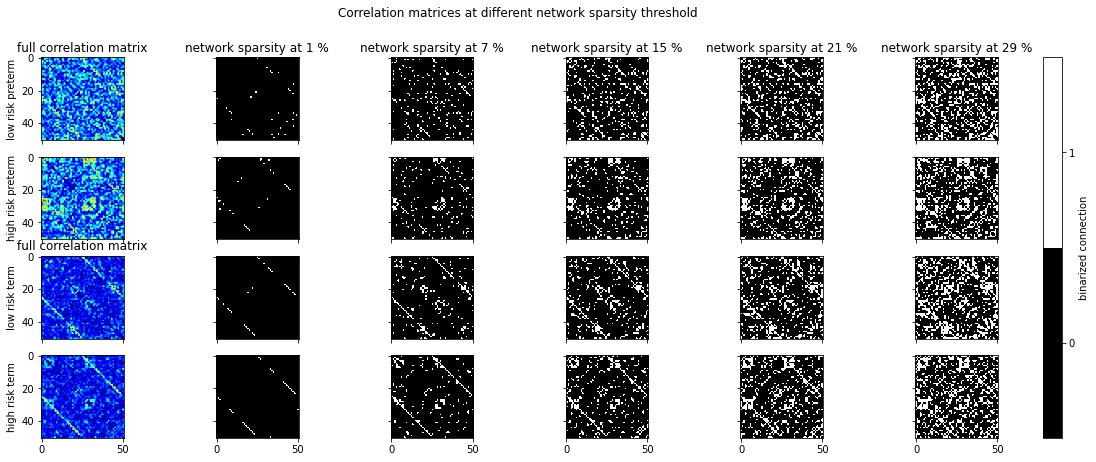

In [35]:
f,axes=plt.subplots(4,6,sharex=True,sharey=True,figsize=(20,7))
network_sparsity_threshold=[int(i) for i in (np.linspace(1,30,5))]
for idx,ax in enumerate(axes[0]):
    if idx==0:
        im=ax.imshow(rearranged_corrmatrix_low_risk_preterm,cmap='jet')
        ax.set_title('full correlation matrix')
        ax.set_ylabel('low risk preterm',fontsize=10)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(rearranged_corrmatrix_low_risk_preterm,network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        ax.set_title('network sparsity at %d %%'%(len(np.where(data_preprocessing.lower_triangle(binarized_matrix)==1)[0])*100/(52*51/2)))
        im.set_clim(-0.5,1.5)
for idx,ax in enumerate(axes[1]):
    if idx==0:
        im=ax.imshow(rearranged_corrmatrix_high_risk_preterm,cmap='jet')
        ax.set_ylabel('high risk preterm',fontsize=10)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(rearranged_corrmatrix_high_risk_preterm,network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        im.set_clim(-0.5,1.5)

for idx,ax in enumerate(axes[2]):
    if idx==0:
        im=ax.imshow(rearranged_corrmatrix_low_risk_term,cmap='jet')
        ax.set_title('full correlation matrix')
        ax.set_ylabel('low risk term',fontsize=10)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(rearranged_corrmatrix_low_risk_term,network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        im.set_clim(-0.5,1.5)
for idx,ax in enumerate(axes[3]):
    if idx==0:
        im=ax.imshow(rearranged_corrmatrix_high_risk_term,cmap='jet')
        ax.set_ylabel('high risk term',fontsize=10)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(rearranged_corrmatrix_high_risk_term,network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        im.set_clim(-0.5,1.5)

f.suptitle('Correlation matrices at different network sparsity threshold')
f.colorbar(im,ax=np.concatenate(axes),ticks=range(2),label='binarized connection',fraction=0.046, pad=0.04)

In [16]:
X_preterm.shape

(28, 51)

#### 1.3 Network metrics

In [30]:
# calculating pearson correlation matrix of volumetric data
X_preterm=np.load('./preprocessed_data/volumetric/preterm/high_low_risk_vol_preterm_Imperial_dataset_PRS%d.npy'%0)
y_preterm=np.load('./preprocessed_data/volumetric/preterm/high_low_risk_vol_preterm_Imperial_dataset_PRS0_label.npy')

X_term=np.load('./preprocessed_data/volumetric/term/high_low_risk_vol_term_Imperial_dataset_PRS0.npy')
y_term=np.load('./preprocessed_data/volumetric/term/high_low_risk_vol_term_Imperial_dataset_PRS0_label.npy')


corrmatrix_low_risk_preterm=abs(np.corrcoef(X_preterm[y_preterm==0,:],rowvar=False))
np.fill_diagonal(corrmatrix_low_risk_preterm,0)
corrmatrix_high_risk_preterm=abs(np.corrcoef(X_preterm[y_preterm==1,:],rowvar=False))
np.fill_diagonal(corrmatrix_high_risk_preterm,0)

corrmatrix_low_risk_term=abs(np.corrcoef(X_term[y_term==0,:],rowvar=False))
np.fill_diagonal(corrmatrix_low_risk_term,0)
corrmatrix_high_risk_term=abs(np.corrcoef(X_term[y_term==1,:],rowvar=False))
np.fill_diagonal(corrmatrix_high_risk_term,0)


In [13]:
#generate binarized matrices for over a range of network sparsity for high and low risk groups
binarized_low_risk_matrices_preterm=np.asarray([data_preprocessing.lower_triangle(graph_analysis.binarize_matrix_based_on_sparsity_threshold(corrmatrix_low_risk_preterm,network_sparsity_threshold/100,bins=100)) for network_sparsity_threshold in np.linspace(1,30,30)])
binarized_high_risk_matrices_preterm=np.asarray([data_preprocessing.lower_triangle(graph_analysis.binarize_matrix_based_on_sparsity_threshold(corrmatrix_high_risk_preterm,network_sparsity_threshold/100,bins=100)) for network_sparsity_threshold in np.linspace(1,30,30)])


binarized_low_risk_matrices_term=np.asarray([data_preprocessing.lower_triangle(graph_analysis.binarize_matrix_based_on_sparsity_threshold(corrmatrix_low_risk_term,network_sparsity_threshold/100,bins=100)) for network_sparsity_threshold in np.linspace(1,30,30)])
binarized_high_risk_matrices_term=np.asarray([data_preprocessing.lower_triangle(graph_analysis.binarize_matrix_based_on_sparsity_threshold(corrmatrix_high_risk_term,network_sparsity_threshold/100,bins=100)) for network_sparsity_threshold in np.linspace(1,30,30)])

In [16]:
#calculating graph_metrics_low_risk
import tqdm

for threshold in tqdm.tqdm(range(30)):
    temp_path_low_risk='./log/volumetric/preterm/PRS0/obsv_graph_metrics_vol_low_risk_preterm_Imperial_PRS0.txt'
    low_risk_metrics=graph_analysis.calculate_network_metrics_random_volumetric_data(data_preprocessing.reverse_lower_triangle(binarized_low_risk_matrices_preterm[threshold],51))

    with open(temp_path_low_risk,'ab') as f:
        np.savetxt(f,np.asarray([low_risk_metrics]),delimiter='\t')

    temp_path_high_risk='./log/volumetric/preterm/PRS0/obsv_graph_metrics_vol_high_risk_preterm_Imperial_PRS0.txt'
    high_risk_metrics=graph_analysis.calculate_network_metrics_random_volumetric_data(data_preprocessing.reverse_lower_triangle(binarized_high_risk_matrices_preterm[threshold],51))

    with open(temp_path_high_risk,'ab') as n:
        np.savetxt(n,np.asarray([high_risk_metrics]),delimiter='\t')


for threshold in tqdm.tqdm(range(30)):
    temp_path_low_risk='./log/volumetric/term/PRS0/obsv_graph_metrics_vol_low_risk_term_Imperial_PRS0.txt'
    low_risk_metrics=graph_analysis.calculate_network_metrics_random_volumetric_data(data_preprocessing.reverse_lower_triangle(binarized_low_risk_matrices_term[threshold],51))

    with open(temp_path_low_risk,'ab') as f:
        np.savetxt(f,np.asarray([low_risk_metrics]),delimiter='\t')

    temp_path_high_risk='./log/volumetric/term/PRS0/obsv_graph_metrics_vol_high_risk_term_Imperial_PRS0.txt'
    high_risk_metrics=graph_analysis.calculate_network_metrics_random_volumetric_data(data_preprocessing.reverse_lower_triangle(binarized_high_risk_matrices_term[threshold],51))

    with open(temp_path_high_risk,'ab') as n:
        np.savetxt(n,np.asarray([high_risk_metrics]),delimiter='\t')

100%|██████████| 30/30 [03:13<00:00,  6.45s/it]


#### 1.4 Permutation statistics

In [84]:
#run executable_script/perm_graph_network.py to calculate 1000 permuted network metrics.
import glob
import tqdm
Imperial_vol_dict_preterm=dict()
Imperial_vol_dict_term=dict()
for i in tqdm.tqdm(range(11)):
    obsv_high_preterm=np.loadtxt('./log/volumetric/preterm/PRS%d/obsv_graph_metrics_vol_high_risk_preterm_Imperial_PRS%d.txt'%(i,i))
    obsv_low_preterm=np.loadtxt('./log/volumetric/preterm/PRS%d/obsv_graph_metrics_vol_low_risk_preterm_Imperial_PRS%d.txt'%(i,i))
    Imperial_vol_dict_preterm['PRS%d'%i]={'obsv_high':obsv_high_preterm,
    'obsv_low':obsv_low_preterm}

    perm_high_preterm,perm_low_preterm=graph_analysis.preprocess_perm_graph_results(shape=(-1,30,5),high_risk=sorted(glob.glob('./log/volumetric/preterm/PRS%d/perm_*high*Imperial*run*'%i)),low_risk=sorted(glob.glob('./log/volumetric/preterm/PRS%d/perm_*low*Imperial*run*'%i)))

    Imperial_vol_dict_preterm['PRS%d'%i]['perm_high']=perm_high_preterm
    Imperial_vol_dict_preterm['PRS%d'%i]['perm_low']=perm_low_preterm
    Imperial_vol_dict_preterm['PRS%d'%i]['p_value']=graph_analysis.calculate_perm_p_value(obsv_high_preterm,obsv_low_preterm,perm_high_preterm,perm_low_preterm)
#########################################
    obsv_high_term=np.loadtxt('./log/volumetric/term/PRS%d/obsv_graph_metrics_vol_high_risk_term_Imperial_PRS%d.txt'%(i,i))
    obsv_low_term=np.loadtxt('./log/volumetric/term/PRS%d/obsv_graph_metrics_vol_low_risk_term_Imperial_PRS%d.txt'%(i,i))
    
    Imperial_vol_dict_term['PRS%d'%i]={'obsv_high':obsv_high_term,
    'obsv_low':obsv_low_term}

    perm_high_term,perm_low_term=graph_analysis.preprocess_perm_graph_results(shape=(-1,30,5),high_risk=sorted(glob.glob('./log/volumetric/term/PRS%d/perm_*high*Imperial*run*'%i)),low_risk=sorted(glob.glob('./log/volumetric/term/PRS%d/perm_*low*Imperial*run*'%i)))

    Imperial_vol_dict_term['PRS%d'%i]['perm_high']=perm_high_term
    Imperial_vol_dict_term['PRS%d'%i]['perm_low']=perm_low_term

    Imperial_vol_dict_term['PRS%d'%i]['p_value']=graph_analysis.calculate_perm_p_value(obsv_high_term,obsv_low_term,perm_high_term,perm_low_term)


100%|██████████| 11/11 [00:13<00:00,  1.21s/it]


In [90]:
Imperial_vol_dict_preterm['PRS1']['perm_high'][:1000].shape

(1000, 30, 5)

In [41]:
for i in range(11):
    print('for PRS%d:'%i)
    print(np.where(Imperial_vol_dict_preterm['PRS%d'%i]['p_value']<=0.025))
    # print(np.where(Imperial_vol_dict_term['PRS%d'%i]['p_value']<=0.025))

for PRS0:
(array([15, 16]), array([0, 0]))
for PRS1:
(array([], dtype=int64), array([], dtype=int64))
for PRS2:
(array([0, 0, 4, 5]), array([2, 4, 1, 1]))
for PRS3:
(array([0, 0]), array([2, 4]))
for PRS4:
(array([0, 0, 1, 1]), array([2, 4, 2, 4]))
for PRS5:
(array([0, 0]), array([2, 4]))
for PRS6:
(array([0, 0]), array([2, 4]))
for PRS7:
(array([ 0,  0, 13, 14, 15, 16, 17, 18]), array([2, 4, 0, 0, 0, 0, 0, 0]))
for PRS8:
(array([3, 3, 3]), array([0, 2, 4]))
for PRS9:
(array([0, 0, 2, 2]), array([2, 4, 2, 4]))
for PRS10:
(array([0, 0]), array([2, 4]))


Text(0.5, 0.98, 'Network measurements of preterm neonates with Imperial Atlas')

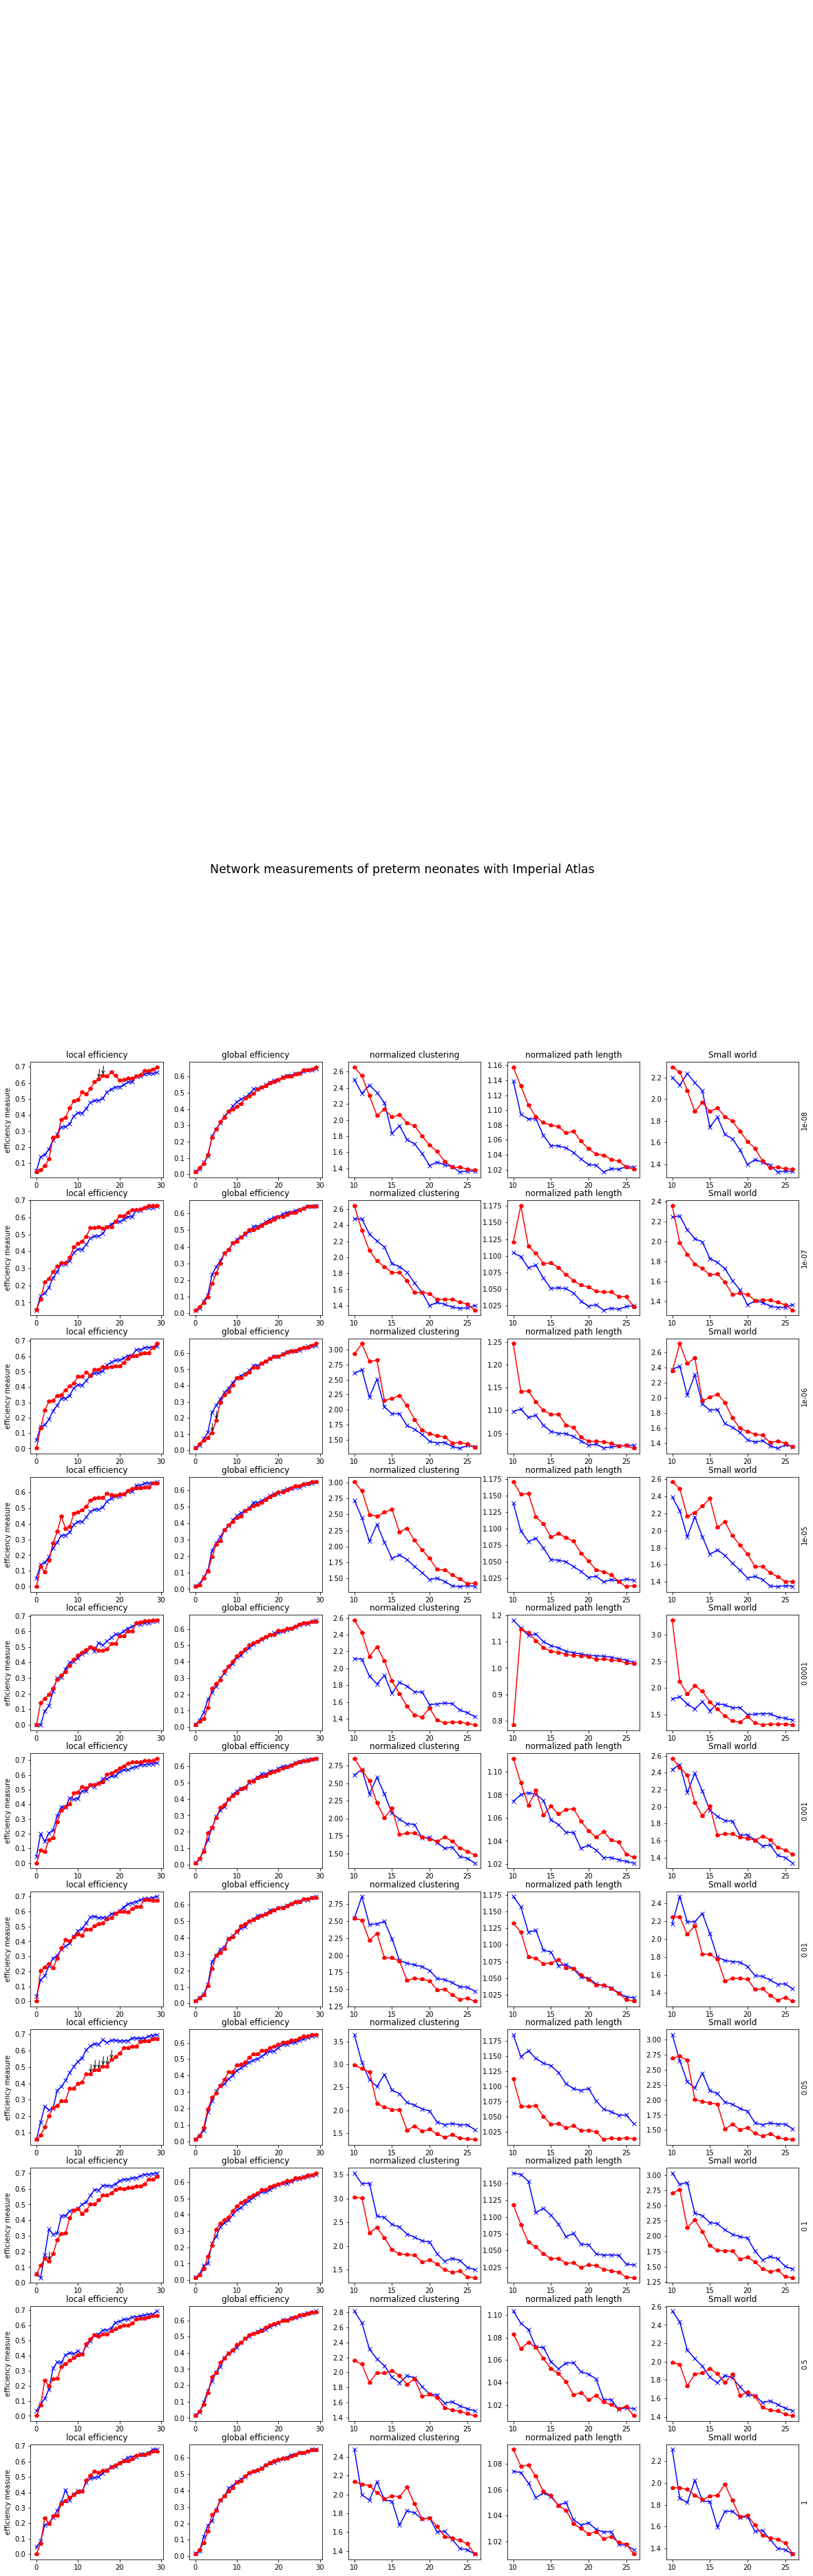

In [45]:
f,axes= plt.subplots(11,5,figsize=(20,40))
titles=['local efficiency','global efficiency','normalized clustering','normalized path length','Small world']
PRS_scores=['1e-08','1e-07','1e-06', '1e-05', '0.0001', '0.001', '0.01', '0.05', '0.1', '0.5', '1']
for i in range(11):
    for n in range(5):
        sig_indices=np.where(Imperial_vol_dict_preterm['PRS%d'%i]['p_value'][:,n]<=0.025)[0]
        obsv_low=Imperial_vol_dict_preterm['PRS%d'%i]['obsv_low']
        obsv_high=Imperial_vol_dict_preterm['PRS%d'%i]['obsv_high']
        if n>1:
            axes[i][n].plot(np.linspace(10,26,17),obsv_low[9:26,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(np.linspace(10,26,17),obsv_high[9:26,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                if idx==0:
                    continue
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
            if n==4:
                axes[i][n].yaxis.set_label_position("right")
                axes[i][n].set_ylabel(PRS_scores[i])

        else:
            if n==0:
                axes[i][n].set_ylabel('efficiency measure')

            axes[i][n].plot(obsv_low[:,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(obsv_high[:,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))

        axes[i][n].set_title(titles[n])
f.suptitle('Network measurements of preterm neonates with Imperial Atlas',fontsize='xx-large')

In [46]:
for i in range(11):
    print('for PRS%d:'%i)
    # print(np.where(Imperial_vol_dict_preterm['PRS%d'%i]['p_value']<=0.025))
    print(np.where(Imperial_vol_dict_term['PRS%d'%i]['p_value']<=0.025))

for PRS0:
(array([0, 0, 1, 1]), array([2, 4, 2, 4]))
for PRS1:
(array([0, 0]), array([2, 4]))
for PRS2:
(array([ 0,  0,  4, 18, 27, 28, 28]), array([2, 4, 1, 2, 2, 2, 4]))
for PRS3:
(array([ 0,  0,  4, 12, 13, 13, 25, 27, 28, 28, 29, 29]), array([2, 4, 1, 2, 2, 4, 2, 2, 2, 4, 2, 4]))
for PRS4:
(array([ 0,  0,  1,  1, 19, 22, 23, 24]), array([2, 4, 2, 4, 2, 2, 2, 2]))
for PRS5:
(array([ 0,  0,  4,  4,  5,  9, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16,
       16, 17, 17, 18, 18, 19, 19, 20, 20, 22, 22]), array([2, 4, 0, 2, 2, 2, 2, 2, 4, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4]))
for PRS6:
(array([ 0,  0,  7,  7,  8,  8,  9,  9, 12, 12, 15, 15, 17]), array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4]))
for PRS7:
(array([ 0,  0,  6,  8,  9, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14,
       14, 14, 15, 15, 15, 16, 16, 17, 17, 18, 18]), array([2, 4, 3, 2, 2, 2, 4, 0, 2, 4, 0, 2, 4, 0, 2, 4, 0, 2, 4, 0, 2, 4,
       2, 4, 2, 4, 2, 4]))
for PRS8:
(array([ 0,  0,  9, 10

Text(0.5, 0.98, 'Network measurements of term neonates with Imperial Atlas')

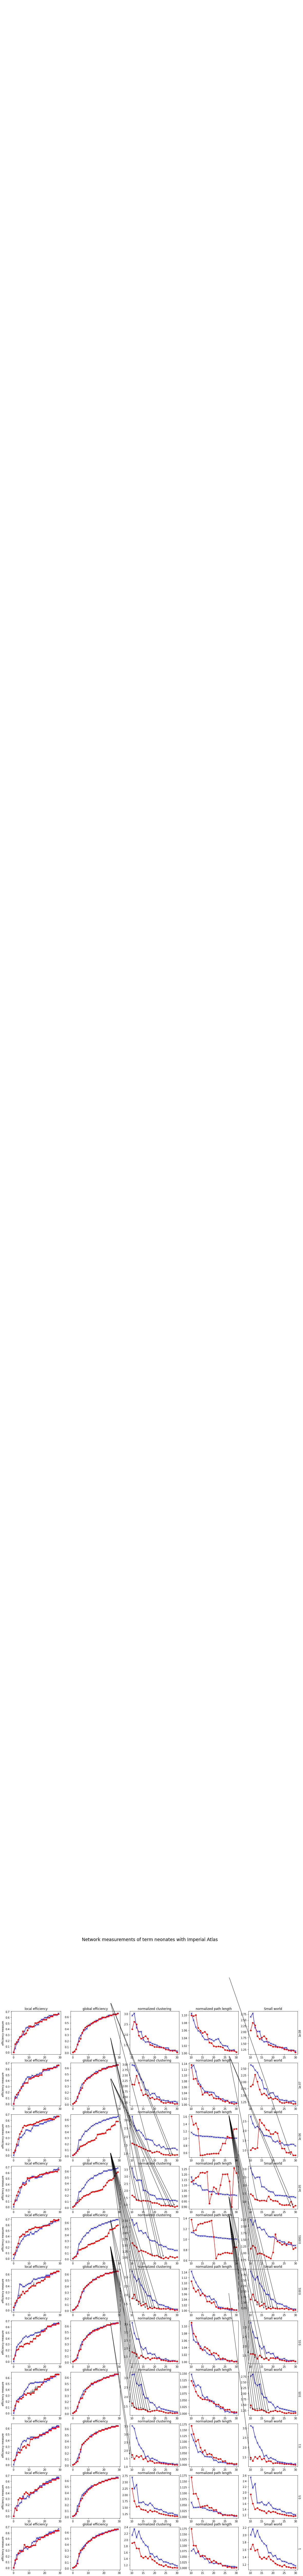

In [85]:
f,axes= plt.subplots(11,5,figsize=(20,40))
titles=['local efficiency','global efficiency','normalized clustering','normalized path length','Small world']
PRS_scores=['1e-08','1e-07','1e-06', '1e-05', '0.0001', '0.001', '0.01', '0.05', '0.1', '0.5', '1']
for i in range(11):
    for n in range(5):
        sig_indices=np.where(Imperial_vol_dict_term['PRS%d'%i]['p_value'][:,n]<=0.025)[0]
        obsv_low=Imperial_vol_dict_term['PRS%d'%i]['obsv_low']
        obsv_high=Imperial_vol_dict_term['PRS%d'%i]['obsv_high']
        if n>1:
            axes[i][n].plot(np.linspace(10,30,21),obsv_low[9:30,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(np.linspace(10,30,21),obsv_high[9:30,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,10),arrowprops=dict(arrowstyle='->'))
                # axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,10),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
        
            if n==4:
                axes[i][n].yaxis.set_label_position("right")
                axes[i][n].set_ylabel(PRS_scores[i])

        else:
            if n==0:
                axes[i][n].set_ylabel('efficiency measure')

            axes[i][n].plot(obsv_low[:,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(obsv_high[:,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
        axes[i][n].set_title(titles[n])

f.suptitle('Network measurements of term neonates with Imperial Atlas',fontsize='xx-large')

Text(0.5, 0.98, 'Network measurements of preterm neonates with Imperial Atlas')

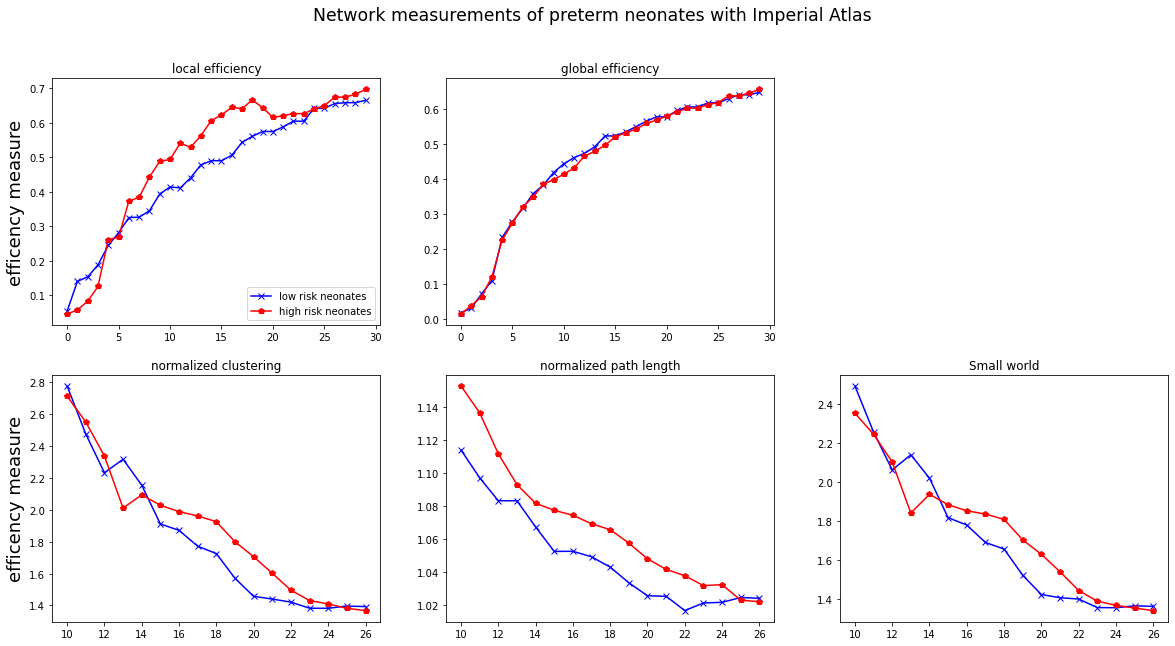

In [24]:
##############LOCAL EFFICIENCY############################
f,axes=plt.subplots(2,3,figsize=(20,10))
axes[0][0].plot(obsv_low_preterm[:,0],'x-',color='blue',label='low risk neonates')
axes[0][0].plot(obsv_high_preterm[:,0],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_local_eff:
#     axes[0][0].annotate(' ',xy=(idx,obsv_high_preterm[:,0][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[0][0].legend(loc='lower right')
axes[0][0].set_title('local efficiency')
axes[0][0].set_ylabel('efficency measure',fontsize=18)
##############GLOBAL EFFICIENCY############################
axes[0][1].plot(obsv_low_preterm[:,1],'x-',color='blue',label='low risk neonates')
axes[0][1].plot(obsv_high_preterm[:,1],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_global_eff:
#     axes[0][1].annotate(' ',xy=(idx,obsv_high_preterm[:,1][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[0][1].set_title('global efficiency')
# axes[0][1].set_ylabel('efficency measure',fontsize=18)
##############NORMALIZED CLUSTERING############################
axes[1][0].plot(np.linspace(10,26,17),obsv_low_preterm[9:26,2],'x-',color='blue',label='low risk neonates')
axes[1][0].plot(np.linspace(10,26,17),obsv_high_preterm[9:26,2],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_clus_eff:
#     if idx==0:
#         continue
#     axes[1][0].annotate(' ',xy=(idx,obsv_high_preterm[:,2][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[1][0].set_title('normalized clustering')
axes[1][0].set_ylabel('efficency measure',fontsize=18)
# ##############NORMALIZED PATH############################
axes[1][1].plot(np.linspace(10,26,17),obsv_low_preterm[9:26,3],'x-',color='blue',label='low risk neonates')
axes[1][1].plot(np.linspace(10,26,17),obsv_high_preterm[9:26,3],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_path_eff:
#     if idx==0:
#         continue
#     axes[1][1].annotate(' ',xy=(idx,obsv_high_preterm[:,3][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][1].set_title('normalized path length')
# axes[1][1].set_ylabel('efficency measure',fontsize=18)
##############SMALL WORDNESS############################
axes[1][2].plot(np.linspace(10,26,17),obsv_low_preterm[9:26,4],'x-',color='blue',label='low risk neonates')
axes[1][2].plot(np.linspace(10,26,17),obsv_high_preterm[9:26,4],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_small_eff:
#     if idx==0:
#         continue
#     axes[1][2].annotate(' ',xy=(idx,obsv_high[:,4][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][2].set_title('Small world')
# axes[1][2].set_ylabel('efficency measure',fontsize=18)

f.delaxes(ax=axes[0,2])
f.suptitle('Network measurements of preterm neonates with Imperial Atlas',fontsize='xx-large')

Text(0.5, 0.98, 'Network measurements of term neonates with Imperial Atlas')

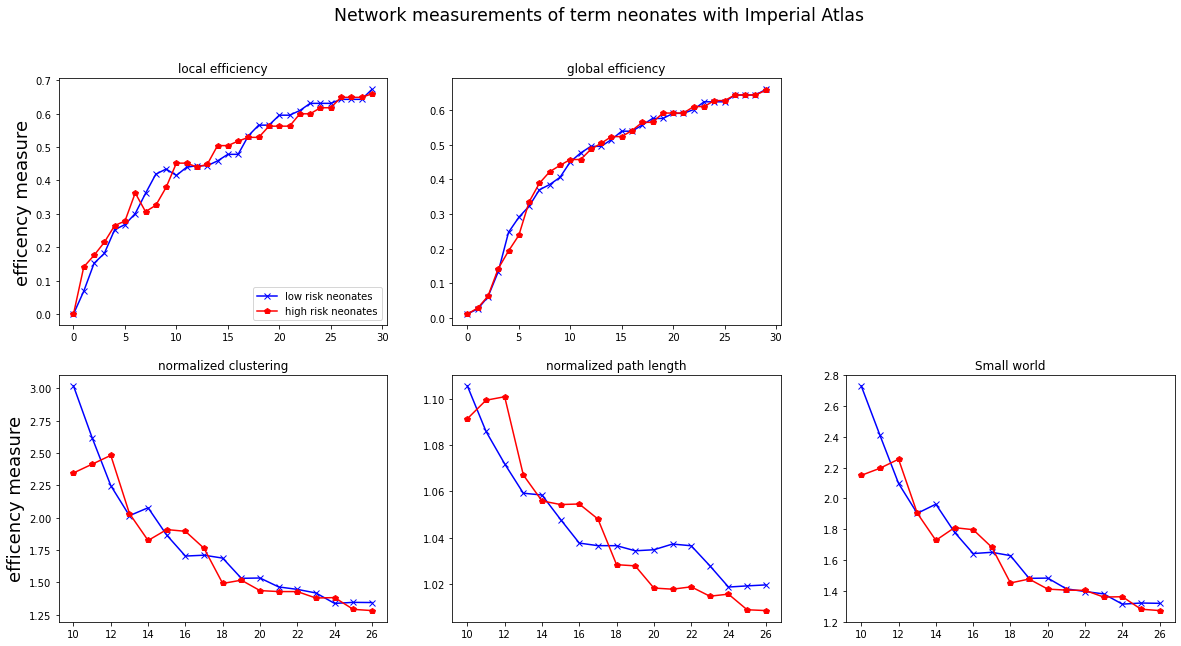

In [25]:
##############LOCAL EFFICIENCY############################
f,axes=plt.subplots(2,3,figsize=(20,10))
axes[0][0].plot(obsv_low_term[:,0],'x-',color='blue',label='low risk neonates')
axes[0][0].plot(obsv_high_term[:,0],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_local_eff:
#     axes[0][0].annotate(' ',xy=(idx,obsv_high_preterm[:,0][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[0][0].legend(loc='lower right')
axes[0][0].set_title('local efficiency')
axes[0][0].set_ylabel('efficency measure',fontsize=18)
##############GLOBAL EFFICIENCY############################
axes[0][1].plot(obsv_low_term[:,1],'x-',color='blue',label='low risk neonates')
axes[0][1].plot(obsv_high_term[:,1],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_global_eff:
#     axes[0][1].annotate(' ',xy=(idx,obsv_high_preterm[:,1][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[0][1].set_title('global efficiency')
# axes[0][1].set_ylabel('efficency measure',fontsize=18)
##############NORMALIZED CLUSTERING############################
axes[1][0].plot(np.linspace(10,26,17),obsv_low_term[9:26,2],'x-',color='blue',label='low risk neonates')
axes[1][0].plot(np.linspace(10,26,17),obsv_high_term[9:26,2],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_clus_eff:
#     if idx==0:
#         continue
#     axes[1][0].annotate(' ',xy=(idx,obsv_high_preterm[:,2][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[1][0].set_title('normalized clustering')
axes[1][0].set_ylabel('efficency measure',fontsize=18)
# ##############NORMALIZED PATH############################
axes[1][1].plot(np.linspace(10,26,17),obsv_low_term[9:26,3],'x-',color='blue',label='low risk neonates')
axes[1][1].plot(np.linspace(10,26,17),obsv_high_term[9:26,3],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_path_eff:
#     if idx==0:
#         continue
#     axes[1][1].annotate(' ',xy=(idx,obsv_high_preterm[:,3][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][1].set_title('normalized path length')
# axes[1][1].set_ylabel('efficency measure',fontsize=18)
##############SMALL WORDNESS############################
axes[1][2].plot(np.linspace(10,26,17),obsv_low_term[9:26,4],'x-',color='blue',label='low risk neonates')
axes[1][2].plot(np.linspace(10,26,17),obsv_high_term[9:26,4],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_small_eff:
#     if idx==0:
#         continue
#     axes[1][2].annotate(' ',xy=(idx,obsv_high[:,4][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][2].set_title('Small world')
# axes[1][2].set_ylabel('efficency measure',fontsize=18)

f.delaxes(ax=axes[0,2])
f.suptitle('Network measurements of term neonates with Imperial Atlas',fontsize='xx-large')

In [26]:
p_value_matrix_preterm=graph_analysis.calculate_perm_p_value(obsv_high_preterm,obsv_low_preterm,perm_high_preterm,perm_low_preterm)

p_value_matrix_term=graph_analysis.calculate_perm_p_value(obsv_high_term,obsv_low_term,perm_high_term,perm_low_term)

In [27]:
print(np.where(p_value_matrix_preterm<=0.025))
print(np.where(p_value_matrix_term<=0.025))

(array([15, 16]), array([0, 0]))
(array([0, 0]), array([2, 4]))


### 2.1 AAL atlas

In [6]:
#Dividing the data set into high and low risk
#get the indices of the low and high risk
#preterm
for i in range(11):
    low_risk_preterm,high_risk_preterm=data_preprocessing.high_low_risk_divide(european_PRS_schizophrenia_preterm[:,i],bins=1000,percentage=0.3)
    X_low_risk_preterm=adjusted_european_volumetric_AAL_matrix_preterm[low_risk_preterm,:]
    X_high_risk_preterm=adjusted_european_volumetric_AAL_matrix_preterm[high_risk_preterm,:]
    X_preterm=np.vstack((X_low_risk_preterm,X_high_risk_preterm))
    X_preterm=StandardScaler().fit_transform(X_preterm)
    y_preterm=np.concatenate((np.zeros(X_low_risk_preterm.shape[0]),np.ones(X_high_risk_preterm.shape[0])))
    #term
    low_risk_term,high_risk_term=data_preprocessing.high_low_risk_divide(european_PRS_schizophrenia_term[:,i],bins=1000,percentage=0.3)
    X_low_risk_term=adjusted_european_volumetric_AAL_matrix_term[low_risk_term,:]
    X_high_risk_term=adjusted_european_volumetric_AAL_matrix_term[high_risk_term,:]
    X_term=np.vstack((X_low_risk_term,X_high_risk_term))
    X_term=StandardScaler().fit_transform(X_term)
    y_term=np.concatenate((np.zeros(X_low_risk_term.shape[0]),np.ones(X_high_risk_term.shape[0])))
    np.save('./preprocessed_data/volumetric/preterm/high_low_risk_vol_preterm_AAL_dataset_PRS%d.npy'%i,X_preterm)
    np.save('./preprocessed_data/volumetric/preterm/high_low_risk_vol_preterm_AAL_dataset_PRS%d_label.npy'%i,y_preterm)
    np.save('./preprocessed_data/volumetric/term/high_low_risk_vol_term_AAL_dataset_PRS%d.npy'%i,X_term)
    np.save('./preprocessed_data/volumetric/term/high_low_risk_vol_term_AAL_dataset_PRS%d_label.npy'%i,y_term)

In [22]:
! ls preprocessed_data/preterm/

AAL_label.npy
Imperial_GM_labels.npy
adjusted_european_GM_volumetric_Imperial_matrix.npy
adjusted_european_PRS_schizophrenia.npy
adjusted_european_volumetric_AAL_matrix.npy
adjusted_european_volumetric_Imperial_matrix.npy
european_PRS_schizophrenia.npy
european_age_at_scan.npy
european_gestational_age.npy
european_icv.npy
graph_metrics_vol_high_risk_AAL.txt
graph_metrics_vol_high_risk_Imperial.txt
graph_metrics_vol_low_risk_AAL.txt
graph_metrics_vol_low_risk_Imperial.txt
high_low_risk_vol_AAL_dataset.npy
high_low_risk_vol_Imperial_dataset.npy


### 2.2 Visualising

In [23]:
#rearrange the matrix by side
right_indices=np.array([idx for idx,i in enumerate(AAL_label) if '_R' in i])
print(right_indices.shape)
left_indices=np.array([idx for idx,i in enumerate(AAL_label) if '_L' in i])
left_indices=np.delete(left_indices,np.where(left_indices==69)[0])#removed the paracentral_lobuble_r
print(left_indices.shape)
neither_indices=np.array([idx for idx,i in enumerate(AAL_label) if '_R' not in i and '_L' not in i])
rearrange_by_side_indices=np.concatenate((right_indices,left_indices,neither_indices),axis=0)

(46,)
(46,)


In [24]:
# calculating pearson correlation matrix of volumetric data
# calculating pearson correlation matrix of volumetric data
corrmatrix_low_risk_preterm=abs(np.corrcoef(X_preterm[y_preterm==0,:],rowvar=False))
np.fill_diagonal(corrmatrix_low_risk_preterm,0)
corrmatrix_high_risk_preterm=abs(np.corrcoef(X_preterm[y_preterm==1,:],rowvar=False))
np.fill_diagonal(corrmatrix_high_risk_preterm,0)

corrmatrix_low_risk_term=abs(np.corrcoef(X_term[y_term==0,:],rowvar=False))
np.fill_diagonal(corrmatrix_low_risk_term,0)
corrmatrix_high_risk_term=abs(np.corrcoef(X_term[y_term==1,:],rowvar=False))
np.fill_diagonal(corrmatrix_high_risk_term,0)


In [25]:
rearranged_corrmatrix_low_risk_preterm=np.asarray([[corrmatrix_low_risk_preterm[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

rearranged_corrmatrix_high_risk_preterm=np.asarray([[corrmatrix_high_risk_preterm[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

rearranged_corrmatrix_low_risk_term=np.asarray([[corrmatrix_low_risk_term[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

rearranged_corrmatrix_high_risk_term=np.asarray([[corrmatrix_high_risk_term[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

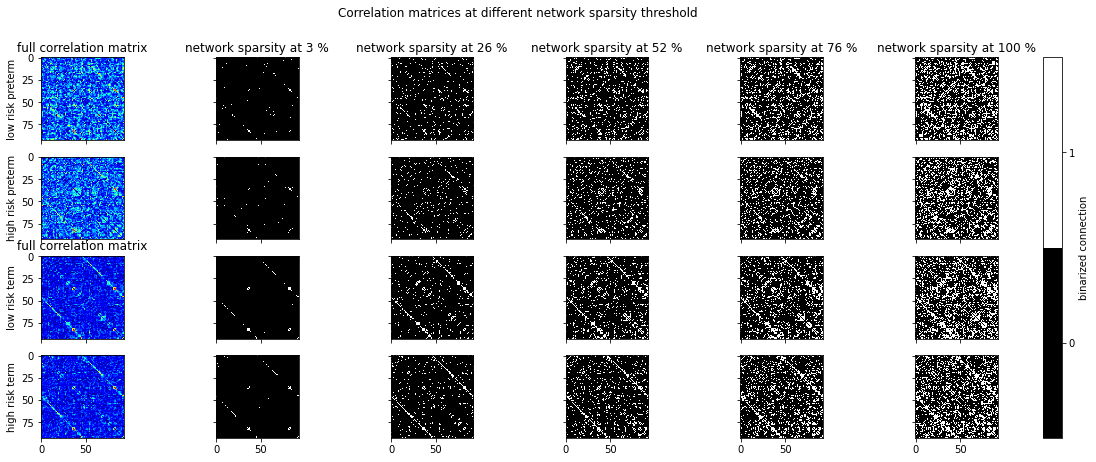

In [27]:
f,axes=plt.subplots(4,6,sharex=True,sharey=True,figsize=(20,7))
network_sparsity_threshold=[int(i) for i in (np.linspace(1,30,5))]
for idx,ax in enumerate(axes[0]):
    if idx==0:
        im=ax.imshow(rearranged_corrmatrix_low_risk_preterm,cmap='jet')
        ax.set_title('full correlation matrix')
        ax.set_ylabel('low risk preterm',fontsize=10)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(rearranged_corrmatrix_low_risk_preterm,network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        ax.set_title('network sparsity at %d %%'%(len(np.where(data_preprocessing.lower_triangle(binarized_matrix)==1)[0])*100/(52*51/2)))
        im.set_clim(-0.5,1.5)
for idx,ax in enumerate(axes[1]):
    if idx==0:
        im=ax.imshow(rearranged_corrmatrix_high_risk_preterm,cmap='jet')
        ax.set_ylabel('high risk preterm',fontsize=10)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(rearranged_corrmatrix_high_risk_preterm,network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        im.set_clim(-0.5,1.5)

for idx,ax in enumerate(axes[2]):
    if idx==0:
        im=ax.imshow(rearranged_corrmatrix_low_risk_term,cmap='jet')
        ax.set_title('full correlation matrix')
        ax.set_ylabel('low risk term',fontsize=10)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(rearranged_corrmatrix_low_risk_term,network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        im.set_clim(-0.5,1.5)
for idx,ax in enumerate(axes[3]):
    if idx==0:
        im=ax.imshow(rearranged_corrmatrix_high_risk_term,cmap='jet')
        ax.set_ylabel('high risk term',fontsize=10)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(rearranged_corrmatrix_high_risk_term,network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        im.set_clim(-0.5,1.5)

f.suptitle('Correlation matrices at different network sparsity threshold')
f.colorbar(im,ax=np.concatenate(axes),ticks=range(2),label='binarized connection',fraction=0.046, pad=0.04)

In [28]:
#generate binarized matrices for over a range of network sparsity for high and low risk groups
binarized_low_risk_matrices_preterm=np.asarray([data_preprocessing.lower_triangle(graph_analysis.binarize_matrix_based_on_sparsity_threshold(corrmatrix_low_risk_preterm,network_sparsity_threshold/100,bins=100)) for network_sparsity_threshold in np.linspace(1,30,30)])
binarized_high_risk_matrices_preterm=np.asarray([data_preprocessing.lower_triangle(graph_analysis.binarize_matrix_based_on_sparsity_threshold(corrmatrix_high_risk_preterm,network_sparsity_threshold/100,bins=100)) for network_sparsity_threshold in np.linspace(1,30,30)])


binarized_low_risk_matrices_term=np.asarray([data_preprocessing.lower_triangle(graph_analysis.binarize_matrix_based_on_sparsity_threshold(corrmatrix_low_risk_term,network_sparsity_threshold/100,bins=100)) for network_sparsity_threshold in np.linspace(1,30,30)])
binarized_high_risk_matrices_term=np.asarray([data_preprocessing.lower_triangle(graph_analysis.binarize_matrix_based_on_sparsity_threshold(corrmatrix_high_risk_term,network_sparsity_threshold/100,bins=100)) for network_sparsity_threshold in np.linspace(1,30,30)])

In [29]:
# #calculating graph_metrics_low_risk
# import tqdm

# for threshold in tqdm.tqdm(range(30)):
#     temp_path_low_risk='./preprocessed_data/preterm/graph_metrics_vol_low_risk_AAL.txt'
#     low_risk_metrics=graph_analysis.calculate_network_metrics_random_volumetric_data(data_preprocessing.reverse_lower_triangle(binarized_low_risk_matrices[threshold],51))

#     with open(temp_path_low_risk,'ab') as f:
#         np.savetxt(f,np.asarray([low_risk_metrics]),delimiter='\t')

#     temp_path_high_risk='./preprocessed_data/preterm/graph_metrics_vol_high_risk_AAL.txt'
#     high_risk_metrics=graph_analysis.calculate_network_metrics_random_volumetric_data(data_preprocessing.reverse_lower_triangle(binarized_high_risk_matrices[threshold],51))

#     with open(temp_path_high_risk,'ab') as n:
#         np.savetxt(n,np.asarray([high_risk_metrics]),delimiter='\t')

import tqdm

for threshold in tqdm.tqdm(range(30)):
    temp_path_low_risk='./preprocessed_data/term/graph_metrics_vol_low_risk_AAL.txt'
    low_risk_metrics=graph_analysis.calculate_network_metrics_random_volumetric_data(data_preprocessing.reverse_lower_triangle(binarized_low_risk_matrices_term[threshold],51))

    with open(temp_path_low_risk,'ab') as f:
        np.savetxt(f,np.asarray([low_risk_metrics]),delimiter='\t')

    temp_path_high_risk='./preprocessed_data/term/graph_metrics_vol_high_risk_AAL.txt'
    high_risk_metrics=graph_analysis.calculate_network_metrics_random_volumetric_data(data_preprocessing.reverse_lower_triangle(binarized_high_risk_matrices_term[threshold],51))

    with open(temp_path_high_risk,'ab') as n:
        np.savetxt(n,np.asarray([high_risk_metrics]),delimiter='\t')

100%|██████████| 30/30 [03:06<00:00,  6.22s/it]


In [83]:
#run executable_script/perm_graph_network.py to calculate 1000 permuted network metrics.
import glob
import tqdm
AAL_vol_dict_preterm=dict()
AAL_vol_dict_term=dict()
for i in tqdm.tqdm(range(11)):
    obsv_high_preterm=np.loadtxt('./log/volumetric/preterm/PRS%d/obsv_graph_metrics_vol_high_risk_preterm_AAL_PRS%d.txt'%(i,i))
    obsv_low_preterm=np.loadtxt('./log/volumetric/preterm/PRS%d/obsv_graph_metrics_vol_low_risk_preterm_AAL_PRS%d.txt'%(i,i))
    AAL_vol_dict_preterm['PRS%d'%i]={'obsv_high':obsv_high_preterm,
    'obsv_low':obsv_low_preterm}

    perm_high_preterm,perm_low_preterm=graph_analysis.preprocess_perm_graph_results(shape=(-1,30,5),high_risk=sorted(glob.glob('./log/volumetric/preterm/PRS%d/perm_*high*AAL*run*'%i)),low_risk=sorted(glob.glob('./log/volumetric/preterm/PRS%d/perm_*low*AAL*run*'%i)))

    AAL_vol_dict_preterm['PRS%d'%i]['perm_high']=perm_high_preterm
    AAL_vol_dict_preterm['PRS%d'%i]['perm_low']=perm_low_preterm
    AAL_vol_dict_preterm['PRS%d'%i]['p_value']=graph_analysis.calculate_perm_p_value(obsv_high_preterm,obsv_low_preterm,perm_high_preterm,perm_low_preterm)
#########################################
    obsv_high_term=np.loadtxt('./log/volumetric/term/PRS%d/obsv_graph_metrics_vol_high_risk_term_AAL_PRS%d.txt'%(i,i))
    obsv_low_term=np.loadtxt('./log/volumetric/term/PRS%d/obsv_graph_metrics_vol_low_risk_term_AAL_PRS%d.txt'%(i,i))
    
    AAL_vol_dict_term['PRS%d'%i]={'obsv_high':obsv_high_term,
    'obsv_low':obsv_low_term}

    perm_high_term,perm_low_term=graph_analysis.preprocess_perm_graph_results(shape=(-1,30,5),high_risk=sorted(glob.glob('./log/volumetric/term/PRS%d/perm_*high*AAL*run*'%i)),low_risk=sorted(glob.glob('./log/volumetric/term/PRS%d/perm_*low*AAL*run*'%i)))

    AAL_vol_dict_term['PRS%d'%i]['perm_high']=perm_high_term
    AAL_vol_dict_term['PRS%d'%i]['perm_low']=perm_low_term

    AAL_vol_dict_term['PRS%d'%i]['p_value']=graph_analysis.calculate_perm_p_value(obsv_high_term,obsv_low_term,perm_high_term,perm_low_term)


100%|██████████| 11/11 [00:12<00:00,  1.14s/it]


In [81]:
for i in range(11):
    print('for PRS%d:'%i)
    print(np.where(AAL_vol_dict_preterm['PRS%d'%i]['p_value']<=0.025))
    # print(np.where(AAL_vol_dict_term['PRS%d'%i]['p_value']<=0.025))

for PRS0:
(array([], dtype=int64), array([], dtype=int64))
for PRS1:
(array([], dtype=int64), array([], dtype=int64))
for PRS2:
(array([0, 0]), array([2, 4]))
for PRS3:
(array([8, 9, 9]), array([4, 3, 4]))
for PRS4:
(array([], dtype=int64), array([], dtype=int64))
for PRS5:
(array([7, 8]), array([3, 3]))
for PRS6:
(array([0, 0, 0, 1, 3, 3, 4]), array([0, 2, 4, 0, 3, 4, 4]))
for PRS7:
(array([], dtype=int64), array([], dtype=int64))
for PRS8:
(array([0, 0]), array([2, 4]))
for PRS9:
(array([0, 0, 2, 3]), array([2, 4, 1, 3]))
for PRS10:
(array([ 0,  0,  3,  5,  7,  8,  9, 10, 13, 18]), array([2, 4, 1, 1, 1, 1, 1, 1, 1, 1]))


Text(0.5, 0.98, 'Network measurements of preterm neonates with AAL Atlas')

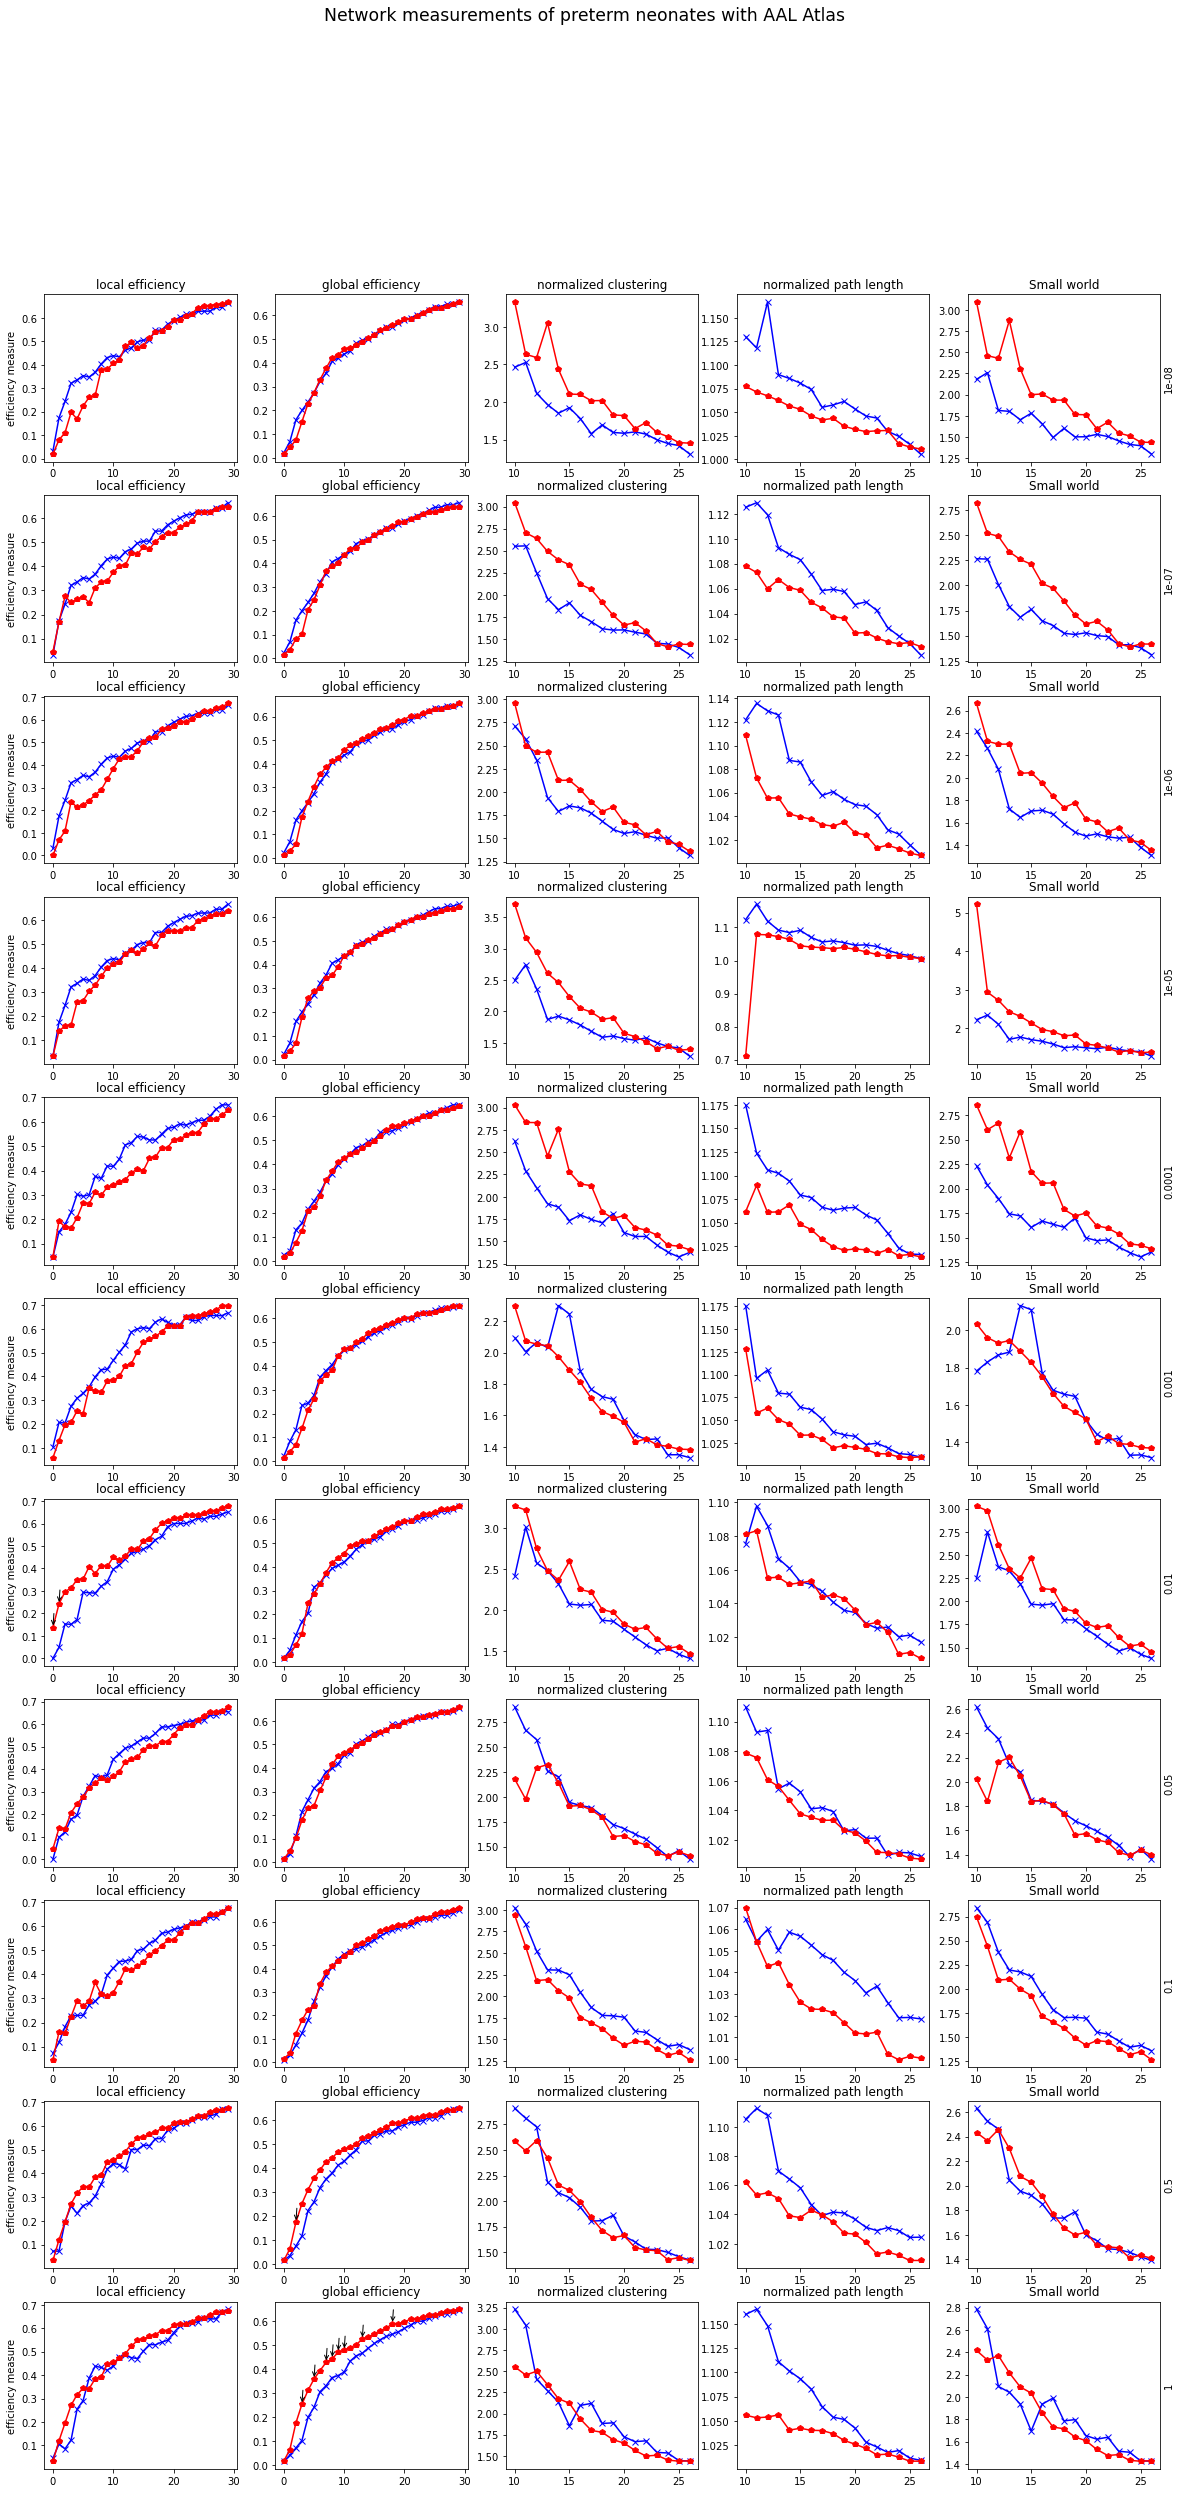

In [79]:
f,axes= plt.subplots(11,5,figsize=(20,40))
titles=['local efficiency','global efficiency','normalized clustering','normalized path length','Small world']
PRS_scores=['1e-08','1e-07','1e-06', '1e-05', '0.0001', '0.001', '0.01', '0.05', '0.1', '0.5', '1']
for i in range(11):
    for n in range(5):
        sig_indices=np.where(AAL_vol_dict_preterm['PRS%d'%i]['p_value'][:,n]<=0.025)[0]
        obsv_low=AAL_vol_dict_preterm['PRS%d'%i]['obsv_low']
        obsv_high=AAL_vol_dict_preterm['PRS%d'%i]['obsv_high']
        if n>1:
            axes[i][n].plot(np.linspace(10,26,17),obsv_low[9:26,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(np.linspace(10,26,17),obsv_high[9:26,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                if idx==0:
                    continue
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
            if n==4:
                axes[i][n].yaxis.set_label_position("right")
                axes[i][n].set_ylabel(PRS_scores[i])

        else:
            if n==0:
                axes[i][n].set_ylabel('efficiency measure')

            axes[i][n].plot(obsv_low[:,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(obsv_high[:,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))

        axes[i][n].set_title(titles[n])
f.suptitle('Network measurements of preterm neonates with AAL Atlas',fontsize='xx-large')

Text(0.5, 0.98, 'Network measurements of term neonates with AAL Atlas')

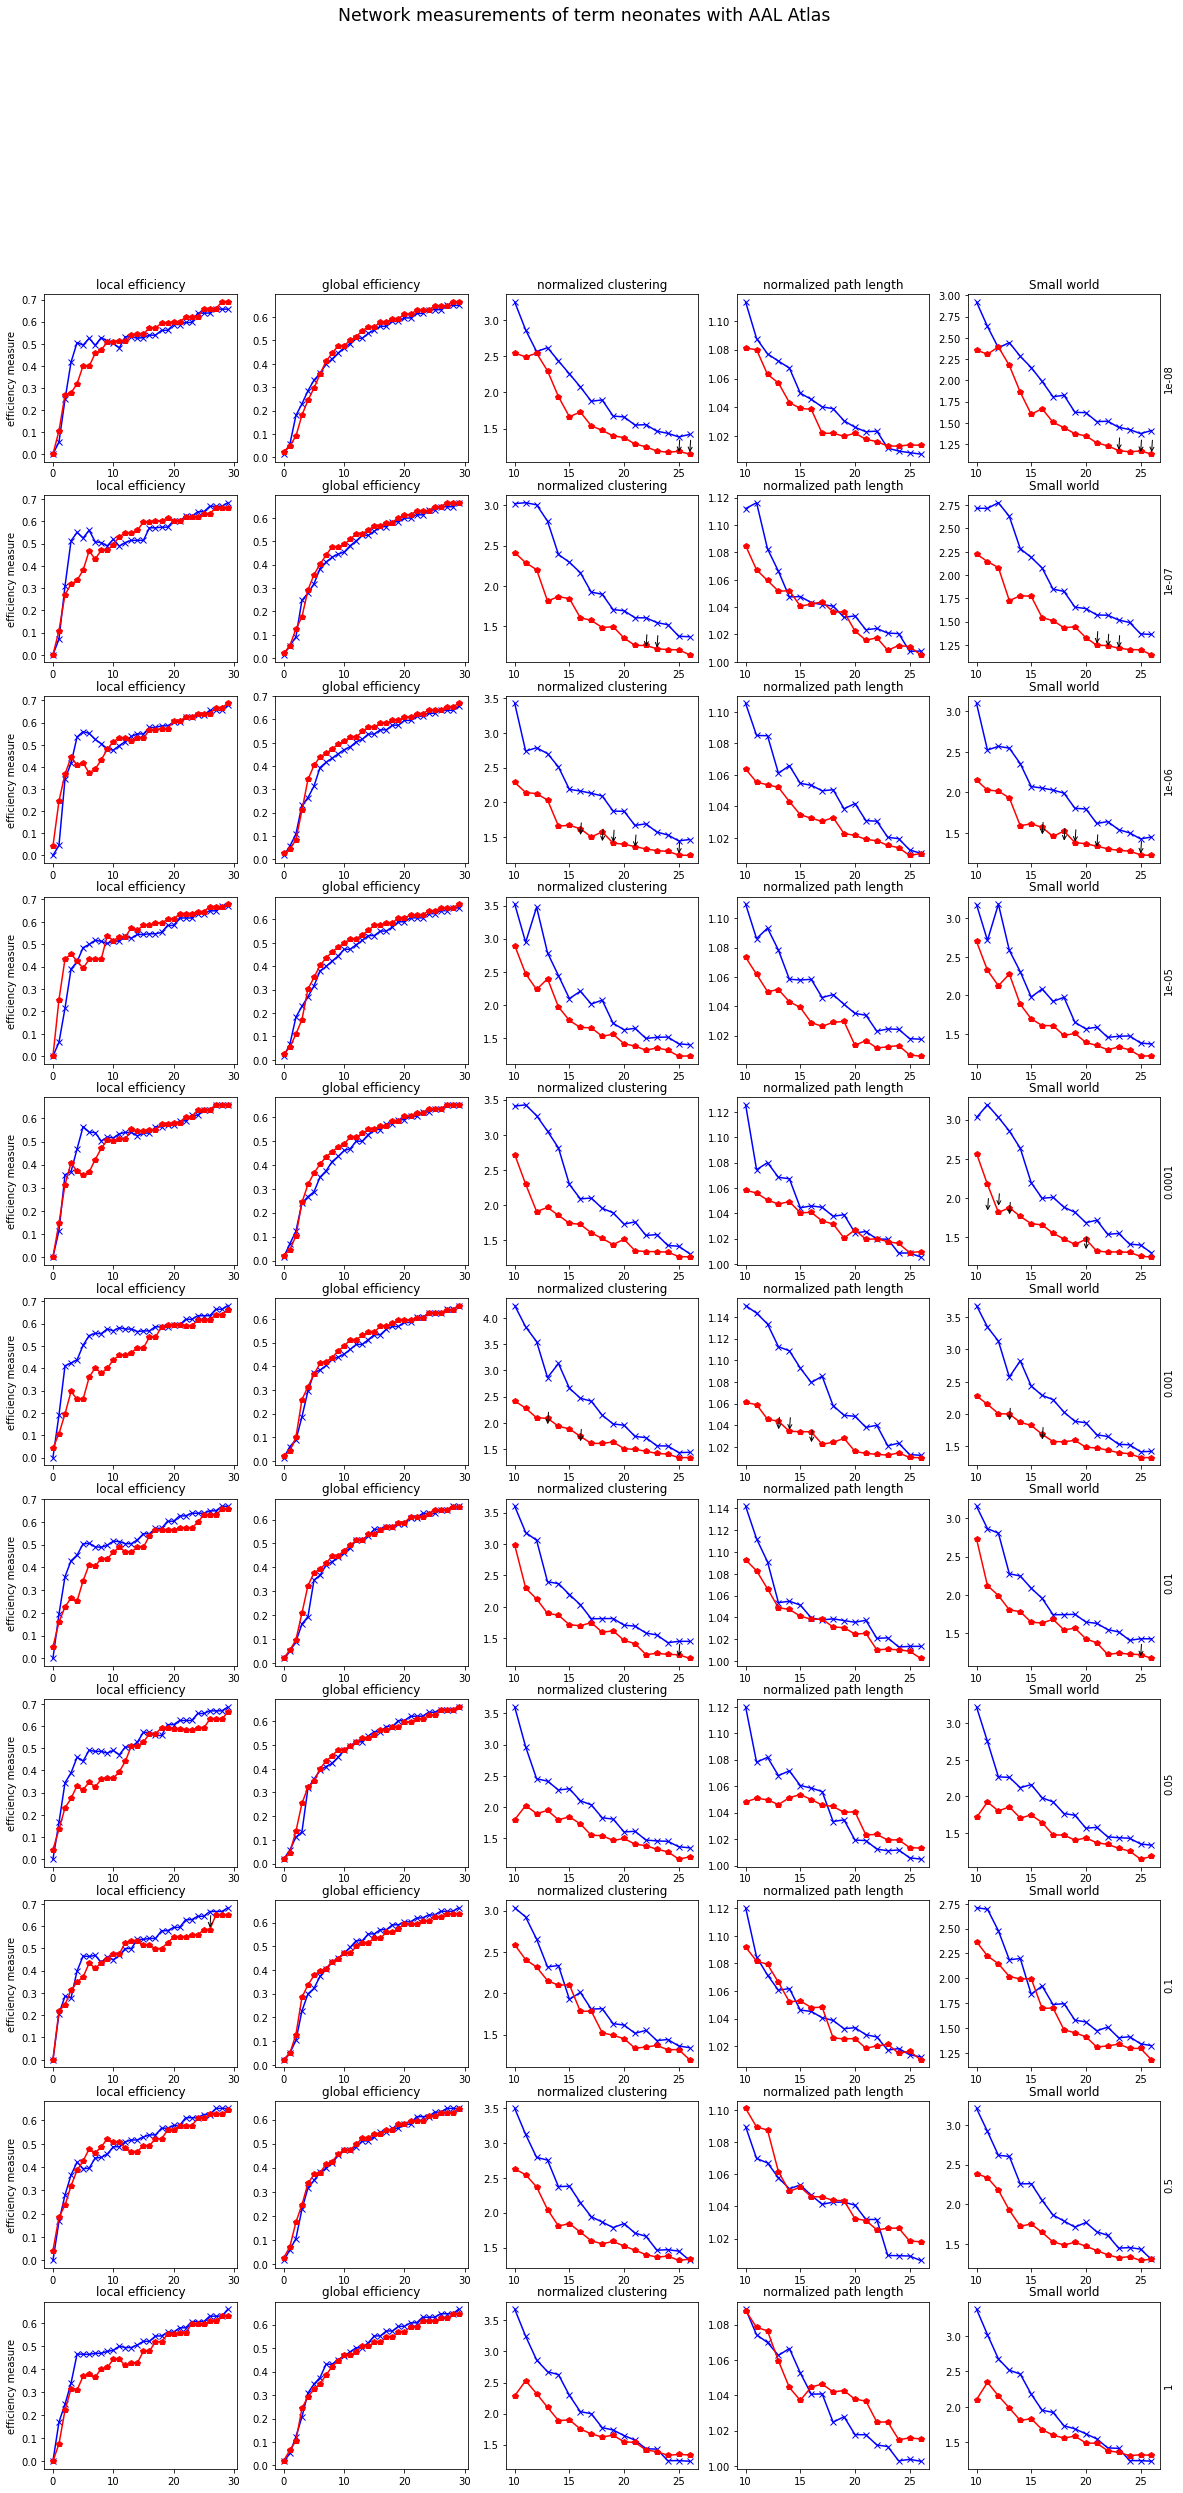

In [82]:
f,axes= plt.subplots(11,5,figsize=(20,40))
titles=['local efficiency','global efficiency','normalized clustering','normalized path length','Small world']
PRS_scores=['1e-08','1e-07','1e-06', '1e-05', '0.0001', '0.001', '0.01', '0.05', '0.1', '0.5', '1']
for i in range(11):
    for n in range(5):
        sig_indices=np.where(AAL_vol_dict_term['PRS%d'%i]['p_value'][:,n]<=0.025)[0]
        obsv_low=AAL_vol_dict_term['PRS%d'%i]['obsv_low']
        obsv_high=AAL_vol_dict_term['PRS%d'%i]['obsv_high']
        if n>1:
            axes[i][n].plot(np.linspace(10,26,17),obsv_low[9:26,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(np.linspace(10,26,17),obsv_high[9:26,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                if idx==0:
                    continue
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
            if n==4:
                axes[i][n].yaxis.set_label_position("right")
                axes[i][n].set_ylabel(PRS_scores[i])

        else:
            if n==0:
                axes[i][n].set_ylabel('efficiency measure')

            axes[i][n].plot(obsv_low[:,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(obsv_high[:,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))

        axes[i][n].set_title(titles[n])
f.suptitle('Network measurements of term neonates with AAL Atlas',fontsize='xx-large')

Text(0.5, 0.98, 'Network measurements of preterm neonates with AAL Atlas')

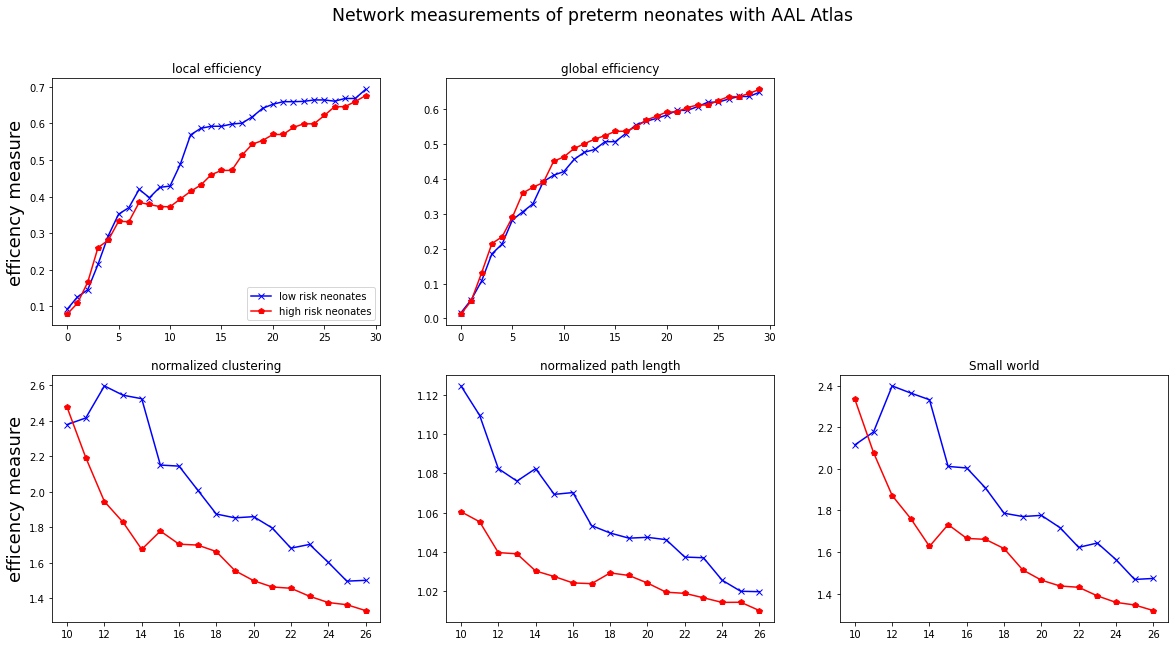

In [38]:
##############LOCAL EFFICIENCY############################
f,axes=plt.subplots(2,3,figsize=(20,10))
axes[0][0].plot(obsv_low_preterm[:,0],'x-',color='blue',label='low risk neonates')
axes[0][0].plot(obsv_high_preterm[:,0],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_local_eff:
#     axes[0][0].annotate(' ',xy=(idx,obsv_high_preterm[:,0][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[0][0].legend(loc='lower right')
axes[0][0].set_title('local efficiency')
axes[0][0].set_ylabel('efficency measure',fontsize=18)
##############GLOBAL EFFICIENCY############################
axes[0][1].plot(obsv_low_preterm[:,1],'x-',color='blue',label='low risk neonates')
axes[0][1].plot(obsv_high_preterm[:,1],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_global_eff:
#     axes[0][1].annotate(' ',xy=(idx,obsv_high_preterm[:,1][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[0][1].set_title('global efficiency')
# axes[0][1].set_ylabel('efficency measure',fontsize=18)
##############NORMALIZED CLUSTERING############################
axes[1][0].plot(np.linspace(10,26,17),obsv_low_preterm[9:26,2],'x-',color='blue',label='low risk neonates')
axes[1][0].plot(np.linspace(10,26,17),obsv_high_preterm[9:26,2],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_clus_eff:
#     if idx==0:
#         continue
#     axes[1][0].annotate(' ',xy=(idx,obsv_high_preterm[:,2][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[1][0].set_title('normalized clustering')
axes[1][0].set_ylabel('efficency measure',fontsize=18)
# ##############NORMALIZED PATH############################
axes[1][1].plot(np.linspace(10,26,17),obsv_low_preterm[9:26,3],'x-',color='blue',label='low risk neonates')
axes[1][1].plot(np.linspace(10,26,17),obsv_high_preterm[9:26,3],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_path_eff:
#     if idx==0:
#         continue
#     axes[1][1].annotate(' ',xy=(idx,obsv_high_preterm[:,3][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][1].set_title('normalized path length')
# axes[1][1].set_ylabel('efficency measure',fontsize=18)
##############SMALL WORDNESS############################
axes[1][2].plot(np.linspace(10,26,17),obsv_low_preterm[9:26,4],'x-',color='blue',label='low risk neonates')
axes[1][2].plot(np.linspace(10,26,17),obsv_high_preterm[9:26,4],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_small_eff:
#     if idx==0:
#         continue
#     axes[1][2].annotate(' ',xy=(idx,obsv_high[:,4][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][2].set_title('Small world')
# axes[1][2].set_ylabel('efficency measure',fontsize=18)

f.delaxes(ax=axes[0,2])
f.suptitle('Network measurements of preterm neonates with AAL Atlas',fontsize='xx-large')

Text(0.5, 0.98, 'Network measurements of term neonates with AAL Atlas')

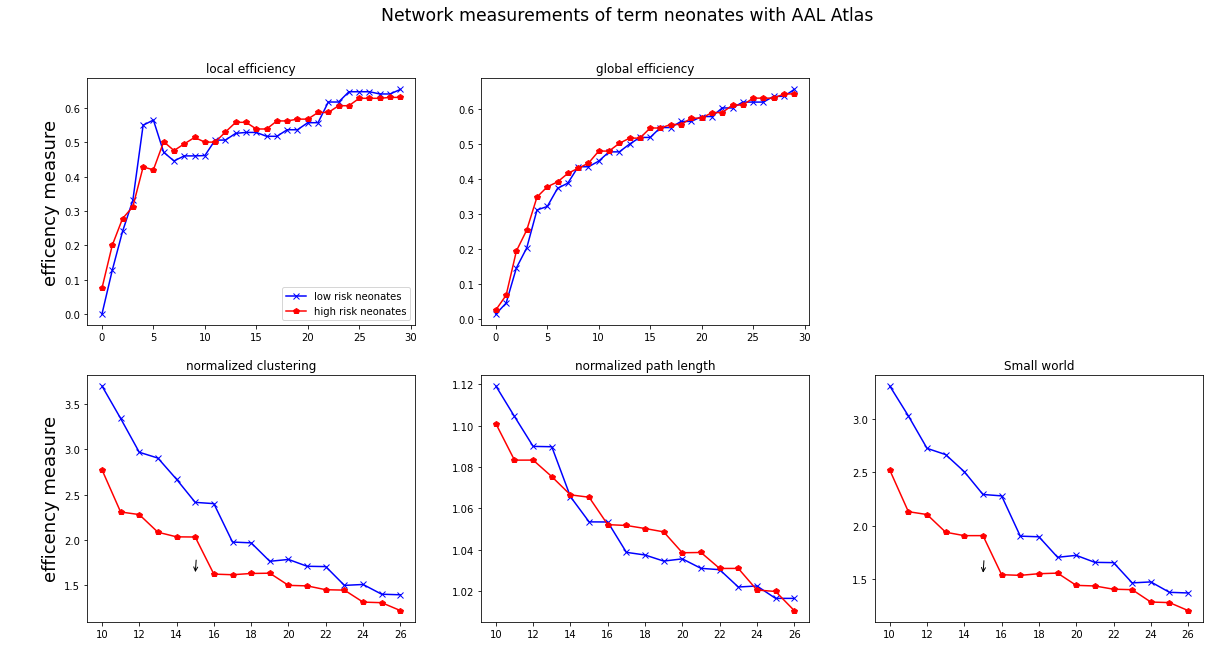

In [43]:
##############LOCAL EFFICIENCY############################
f,axes=plt.subplots(2,3,figsize=(20,10))
axes[0][0].plot(obsv_low_term[:,0],'x-',color='blue',label='low risk neonates')
axes[0][0].plot(obsv_high_term[:,0],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_local_eff:
#     axes[0][0].annotate(' ',xy=(idx,obsv_high_preterm[:,0][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[0][0].legend(loc='lower right')
axes[0][0].set_title('local efficiency')
axes[0][0].set_ylabel('efficency measure',fontsize=18)
##############GLOBAL EFFICIENCY############################
axes[0][1].plot(obsv_low_term[:,1],'x-',color='blue',label='low risk neonates')
axes[0][1].plot(obsv_high_term[:,1],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_global_eff:
#     axes[0][1].annotate(' ',xy=(idx,obsv_high_preterm[:,1][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[0][1].set_title('global efficiency')
# axes[0][1].set_ylabel('efficency measure',fontsize=18)
##############NORMALIZED CLUSTERING############################
axes[1][0].plot(np.linspace(10,26,17),obsv_low_term[9:26,2],'x-',color='blue',label='low risk neonates')
axes[1][0].plot(np.linspace(10,26,17),obsv_high_term[9:26,2],'p-',color='red',label='high risk neonates')
for idx in sig_indices_clus_eff:
    if idx==0:
        continue
    axes[1][0].annotate(' ',xy=(idx,obsv_high_term[:,2][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[1][0].set_title('normalized clustering')
axes[1][0].set_ylabel('efficency measure',fontsize=18)
# ##############NORMALIZED PATH############################
axes[1][1].plot(np.linspace(10,26,17),obsv_low_term[9:26,3],'x-',color='blue',label='low risk neonates')
axes[1][1].plot(np.linspace(10,26,17),obsv_high_term[9:26,3],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_path_eff:
#     if idx==0:
#         continue
#     axes[1][1].annotate(' ',xy=(idx,obsv_high_preterm[:,3][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][1].set_title('normalized path length')
# axes[1][1].set_ylabel('efficency measure',fontsize=18)
##############SMALL WORDNESS############################
axes[1][2].plot(np.linspace(10,26,17),obsv_low_term[9:26,4],'x-',color='blue',label='low risk neonates')
axes[1][2].plot(np.linspace(10,26,17),obsv_high_term[9:26,4],'p-',color='red',label='high risk neonates')
for idx in sig_indices_small_eff:
    if idx==0:
        continue
    axes[1][2].annotate(' ',xy=(idx,obsv_high_term[:,4][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][2].set_title('Small world')
# axes[1][2].set_ylabel('efficency measure',fontsize=18)

f.delaxes(ax=axes[0,2])
f.suptitle('Network measurements of term neonates with AAL Atlas',fontsize='xx-large')